In [1]:
#import libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


df = pd.read_csv('corona.csv') 
df.head(7)

,fever,bodypain,age,runnynose,diffbreath,infected
0,99.329862,0,26,1,-1,0
1,98.115263,1,61,1,0,1
2,99.918088,1,13,0,-1,0
3,101.344456,1,55,1,0,1
4,100.056678,1,37,0,1,0
5,100.667482,0,33,0,-1,0
6,100.277243,1,38,1,1,0


In [2]:
df.shape

(1999, 6)

In [3]:
df['infected'].value_counts()

1    1007
0     992
Name: infected, dtype: int64

C:\Users\Nafisa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='infected', ylabel='count'>

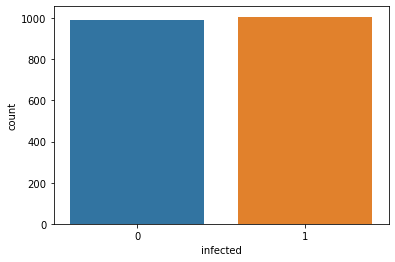

In [4]:
sns.countplot(df['infected'],label="Count")

In [5]:
df.dtypes

fever         float64
bodypain        int64
age             int64
runnynose       int64
diffbreath      int64
infected        int64
dtype: object

In [6]:
df['fever'] = df['fever'].astype(int)

In [7]:
X = df.iloc[:, 2:5].values 
Y = df.iloc[:, 1].values 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [9]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
def models(X_train,Y_train):
    
    #Using Logistic Regression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    
    #Using KNeighborsClassifier 
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, Y_train)

    #Using SVC linear
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, Y_train)

    #Using SVC rbf
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train, Y_train)

    #Using GaussianNB 
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)

    #Using DecisionTreeClassifier 
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)

    #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)
  
    #print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
    print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
    print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [11]:
model = models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.5175125089349535
[1]K Nearest Neighbor Training Accuracy: 0.6833452466047176
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.5125089349535382
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.540385989992852
[4]Gaussian Naive Bayes Training Accuracy: 0.5182273052180129
[5]Decision Tree Classifier Training Accuracy: 0.7112223016440314
[6]Random Forest Classifier Training Accuracy: 0.7055039313795568


In [12]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
  
    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]
  
    print(cm)
    print('Model[{}] Testing Accuracy = "{}!"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
    print()# Print a new line

[[159 162]
 [141 138]]
Model[0] Testing Accuracy = "0.495!"

[[160 161]
 [136 143]]
Model[1] Testing Accuracy = "0.505!"

[[150 171]
 [127 152]]
Model[2] Testing Accuracy = "0.5033333333333333!"

[[170 151]
 [162 117]]
Model[3] Testing Accuracy = "0.47833333333333333!"

[[164 157]
 [150 129]]
Model[4] Testing Accuracy = "0.48833333333333334!"

[[209 112]
 [163 116]]
Model[5] Testing Accuracy = "0.5416666666666666!"

[[173 148]
 [134 145]]
Model[6] Testing Accuracy = "0.53!"



In [13]:
# After 5-fold Cross Validation:

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
log_cv = cross_val_score(LogisticRegression(random_state = 0), X_train, Y_train, cv=5)
print("Logistic Regression: ", log_cv)

knn_cv = cross_val_score(KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2), X_train, Y_train, cv=5)
print("K Nearest Neighbor Classifier: ", knn_cv)

svc_lin_cv = cross_val_score(SVC(kernel = 'linear', random_state = 0), X_train, Y_train, cv=5)
print("Support Vector Machine (Linear Classifier): ",svc_lin_cv)


svc_rbf_cv = cross_val_score(SVC(kernel = 'rbf', random_state = 0), X_train, Y_train, cv=5)
print("Support Vector Machine (RBF Classifier): ",svc_rbf_cv)

gauss_cv = cross_val_score(GaussianNB(), X_train, Y_train, cv=5)
print("Gaussian Naive Bayes: ", gauss_cv)

tree_cv = cross_val_score(DecisionTreeClassifier(criterion = 'entropy', random_state = 0), X_train, Y_train, cv=5)
print("Decision Tree Classifier: ", tree_cv)

forest_cv = cross_val_score(RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0), X_train, Y_train, cv=5)
print("Random Forest Classifier: ", forest_cv)

Logistic Regression:  [0.49642857 0.49285714 0.46428571 0.48571429 0.45519713]
K Nearest Neighbor Classifier:  [0.51071429 0.53928571 0.54285714 0.575      0.54480287]
Support Vector Machine (Linear Classifier):  [0.49642857 0.48571429 0.46428571 0.48214286 0.49820789]
Support Vector Machine (RBF Classifier):  [0.50714286 0.52857143 0.49285714 0.45       0.49462366]
Gaussian Naive Bayes:  [0.51071429 0.48928571 0.46428571 0.49285714 0.4516129 ]
Decision Tree Classifier:  [0.50357143 0.53214286 0.47857143 0.52857143 0.50537634]
Random Forest Classifier:  [0.52142857 0.50714286 0.475      0.54285714 0.5483871 ]


In [16]:
log_cv_average = np.average(log_cv)
print("Logistic Regression Accuracy: ", log_cv_average)

knn_cv_average = np.average(knn_cv)
print("K Nearest Neighbor Classifier Accuracy: ", knn_cv_average)

svc_lin_cv_average = np.average(svc_lin_cv)
print("Support Vector Machine - Linear Classifier Accuracy: ", svc_lin_cv_average)

gauss_cv_average = np.average(gauss_cv)
print("Gaussian Naive Bayes Classifier Accuracy: ", gauss_cv_average)

tree_cv_average = np.average(tree_cv)
print("Decision Tree Classifier Accuracy: ", tree_cv_average)

forest_cv_average = np.average(forest_cv)
print("Random Forest Classifier Accuracy: ", forest_cv_average)

Logistic Regression Accuracy:  0.47889656938044045
K Nearest Neighbor Classifier Accuracy:  0.542532002048131
Support Vector Machine - Linear Classifier Accuracy:  0.4853558627752177
Gaussian Naive Bayes Classifier Accuracy:  0.48175115207373276
Decision Tree Classifier Accuracy:  0.5096466973886329
Random Forest Classifier Accuracy:  0.5189631336405529
